In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import os

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
# Count number of rows with data in each column
print(city_data_df.count())
# Count number of null in each column
print(city_data_df.isnull().sum())
# Count number of rows with data in each column
print(ride_data_df.count())
# Count number of null in each column
print(ride_data_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64
city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [5]:
# Check data types of each column
print(city_data_df.dtypes)
print(ride_data_df.dtypes)

city            object
driver_count     int64
type            object
dtype: object
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [6]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [8]:
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city","city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [11]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [13]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [15]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [16]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [17]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [18]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

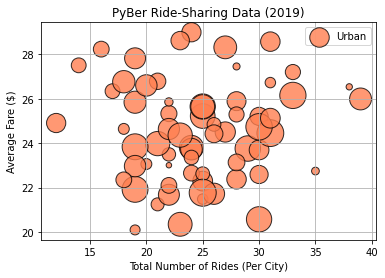

In [19]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = urban_driver_count * 10,
            edgecolor = "black", linewidths = 1,
            alpha = 0.8,
            color = "coral",
            label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

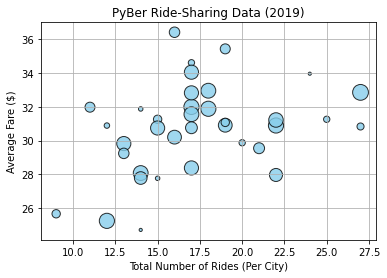

In [20]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = suburban_driver_count * 10,
           edgecolor = "black",linewidths = 1,
           color = "skyblue",
           alpha = 0.8,
           label = "Suburban")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

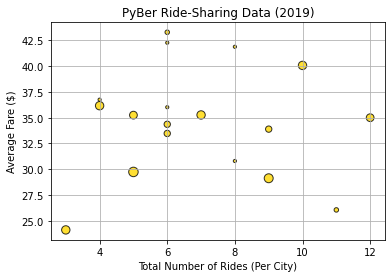

In [21]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = rural_driver_count * 10,
           edgecolor = "black",linewidths = 1,
           color = "gold",
           alpha = 0.8,
           label = "Rural")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend

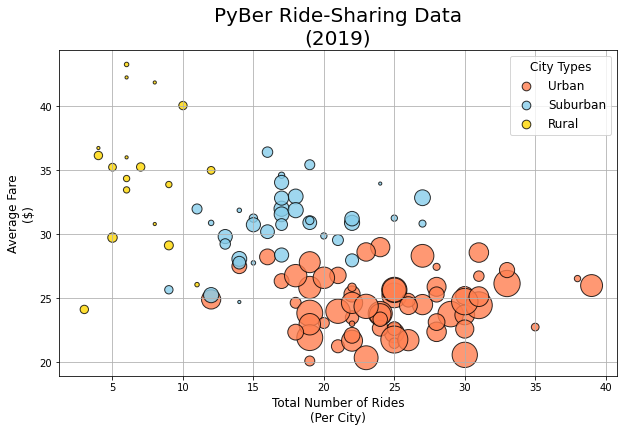

In [22]:
# Add the scatter charts for each type of city.
plt.subplots(figsize = (10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.grid(True)
plt.ylabel("Average Fare\n($)", fontsize = 12)
plt.xlabel("Total Number of Rides\n(Per City)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data\n(2019)", fontsize = 20)

# Create a legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded",
                 scatterpoints = 1, loc = "best", title = "City Types")
for n in range(3):
    lgnd.legendHandles[n]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Show the plot
plt.show()

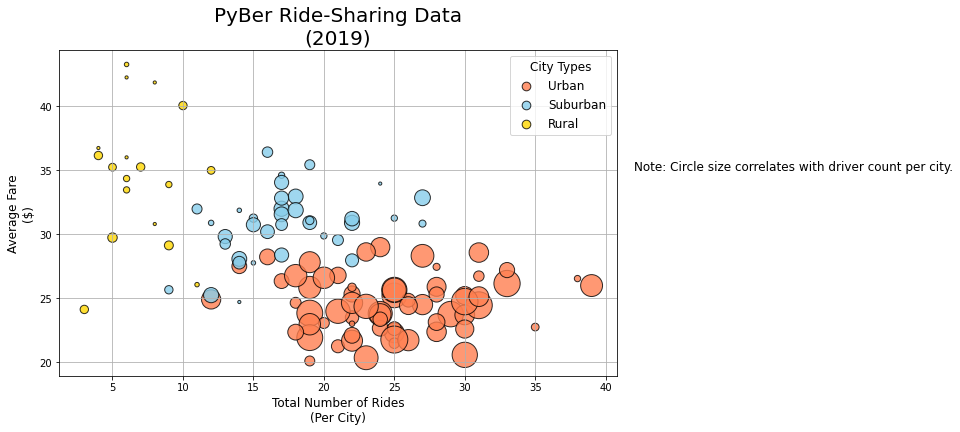

In [23]:
# Add the scatter charts for each type of city.
plt.subplots(figsize = (10, 6))
ride_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fare_data = [urban_avg_fare, suburban_avg_fare, rural_avg_fare]
driver_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
colors = ["coral", "skyblue", "gold"]
labels = ["Urban","Suburban","Rural"]

for n in range(3):
    plt.scatter(ride_data[n], fare_data[n], 
                s=10*driver_data[n], 
                c=colors[n], edgecolor="black", 
                linewidths=1, alpha=0.8, 
                label=labels[n])

# Incorporate the other graph properties
plt.grid(True)
plt.ylabel("Average Fare\n($)", fontsize = 12)
plt.xlabel("Total Number of Rides\n(Per City)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data\n(2019)", fontsize = 20)

# Create a legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded",
                 scatterpoints = 1, loc = "best", title = "City Types")
for n in range(3):
    lgnd.legendHandles[n]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize = "12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [24]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [26]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [30]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2),round(suburban_ride_count.mode(),2),round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [31]:
# import NumPy and the stats module from SciPy
import scipy.stats as sts
import numpy as np

In [32]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [33]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [34]:
# Get the fares for cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [35]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [38]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [39]:
np.mean(suburban_drivers)

13.712

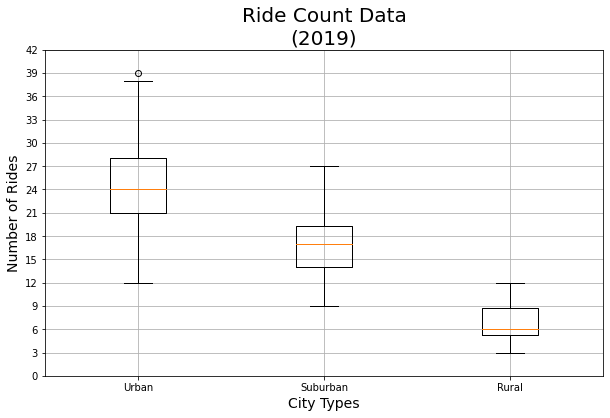

In [40]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(ride_count_data, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data\n(2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()


In [41]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [42]:
urban_ride_count[urban_ride_count==np.max(urban_ride_count)]

city
West Angela    39
Name: ride_id, dtype: int64

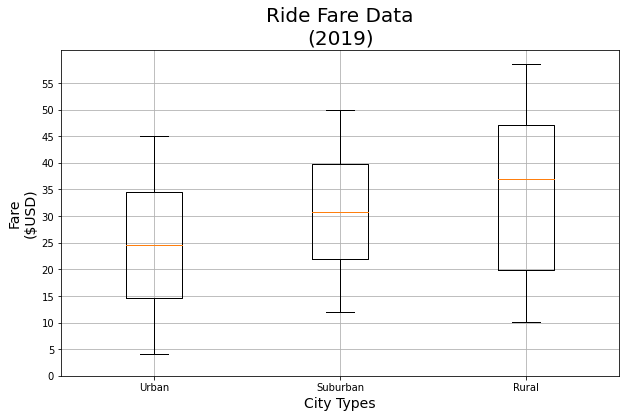

In [43]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(fare_data, labels = x_labels)
ax.set_xlabel("City Types", fontsize = "14")
ax.set_ylabel("Fare\n($USD)", fontsize = "14")
ax.set_title("Ride Fare Data\n(2019)", fontsize = "20")
ax.set_yticks(np.arange(0, 60, step= 5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

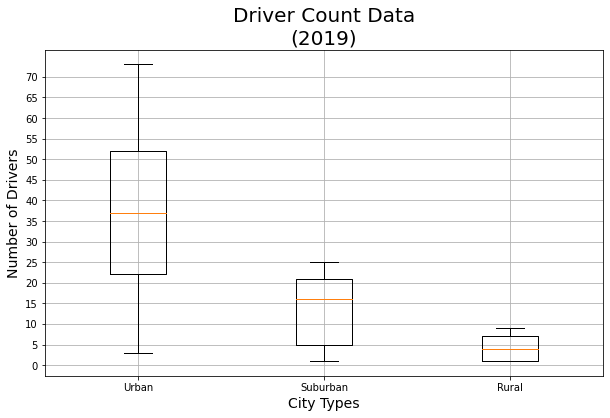

In [44]:
# Create a box-and-whisker plot for the driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(driver_data, labels = x_labels)
ax.set_xlabel("City Types", fontsize = "14")
ax.set_ylabel("Number of Drivers", fontsize = "14")
ax.set_title("Driver Count Data\n(2019)", fontsize = "20")
ax.set_yticks(np.arange(0, 75, step= 5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()